In [1]:
from diffusion_policy.dataset.real_pusht_image_dataset import RealPushTImageDataset

/home/tlips/.conda/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_path = "/home/tlips/Code/diffusion_policy/data/test"
import os 
os.path.exists(dataset_path)


True

In [3]:
n_latency_steps = 0
n_obs_steps = 2
n_action_steps = 8
horizon = 16

shape_meta = {
    "obs": {
        "camera_0": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "camera_1": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "robot_eef_pose_6d_rot": {
            "shape": [10],
            "type": "low_dim"
        },
        "gripper_width" :{
            "shape": [1],
            "type": "low_dim",
        }
    },
    "action": {
        "shape": [10]
    }
}

from omegaconf import OmegaConf
shape_meta = OmegaConf.create(shape_meta)

dataset = RealPushTImageDataset(shape_meta=shape_meta, dataset_path=dataset_path, horizon=horizon, pad_before=n_obs_steps-1+n_latency_steps, pad_after=n_action_steps-1, n_obs_steps=n_obs_steps, n_latency_steps=n_latency_steps, use_cache=True, seed=42, val_ratio=0.00, max_train_episodes=None, delta_action=False)

Acquiring lock on cache.
Cache does not exist. Creating!
Loading lowdim data


Loading image data:   0%|          | 0/1512 [00:00<?, ?it/s]Application has requested 32 threads. Using a thread count greater than 16 is not recommended.
Application has requested 32 threads. Using a thread count greater than 16 is not recommended.
Application has requested 32 threads. Using a thread count greater than 16 is not recommended.
Loading image data: 100%|██████████| 1512/1512 [00:04<00:00, 304.90it/s]


Saving cache to disk.


In [4]:

dataset.replay_buffer

/
 ├── data
 │   ├── action (756, 10) float64
 │   ├── camera_0 (756, 240, 320, 3) uint8
 │   ├── camera_1 (756, 240, 320, 3) uint8
 │   ├── gripper_width (756,) float64
 │   └── robot_eef_pose_6d_rot (756, 9) float64
 └── meta
     └── episode_ends (2,) int64

In [5]:
dataset.get_validation_dataset().replay_buffer

/
 ├── data
 │   ├── action (756, 10) float64
 │   ├── camera_0 (756, 240, 320, 3) uint8
 │   ├── camera_1 (756, 240, 320, 3) uint8
 │   ├── gripper_width (756,) float64
 │   └── robot_eef_pose_6d_rot (756, 9) float64
 └── meta
     └── episode_ends (2,) int64

Episode 0


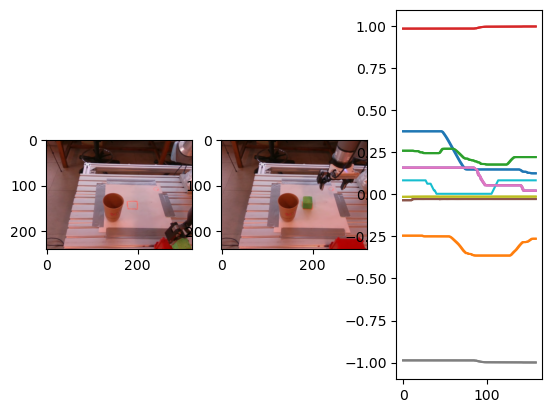

Episode 1


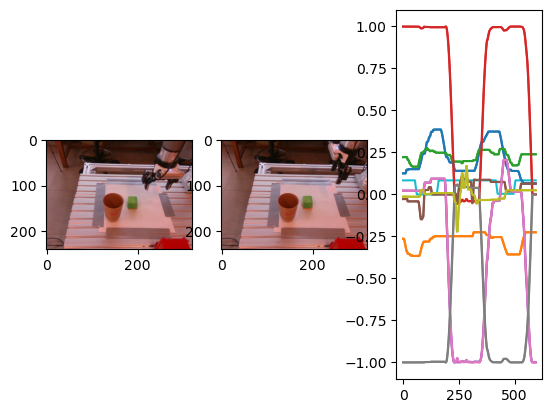

In [6]:
buffer = dataset.replay_buffer
for episode_idx in range(len(buffer.meta.episode_ends)):
    print(f"Episode {episode_idx}")
    episode = buffer.get_episode(episode_idx)
    # get all images "camera_0 from the episode
    images = episode["camera_0"]
    # show first image and last image
    import matplotlib.pyplot as plt
    # side by side
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(images[0])
    ax[1].imshow(images[-1])
    # display state and action 
    actions = episode["action"]
    eef_pose = episode["robot_eef_pose_6d_rot"]
    ax[2].plot(actions)
    ax[2].plot(eef_pose)
    plt.show()



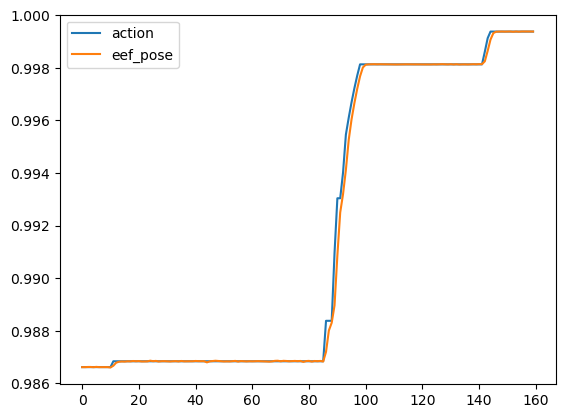

In [11]:
# detailed plot of observations vs actions
import numpy as np
import matplotlib.pyplot as plt
buffer = dataset.replay_buffer
episode_idx = 0
episode = buffer.get_episode(episode_idx)
actions = episode["action"]
eef_pose = episode["robot_eef_pose_6d_rot"]

plt.plot(actions[:, 3])
plt.plot(eef_pose[:, 3])
plt.legend(["action", "eef_pose"])
